In [10]:
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from gplearn import genetic
from gplearn.genetic import SymbolicTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
import sklearn.ensemble as ensemble  # ensemble learning: 集成学习
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

                       2D-A NumberofProtons  2D-A NumberofNeutrons  \
2D-A NumberofProtons               1.000000               0.997852   
2D-A NumberofNeutrons              0.997852               1.000000   
2D-A NumberofShells                0.988957               0.977237   
2D-A SpecificHeat                 -0.813606              -0.777926   
2D-A Density                       0.987338               0.984970   
2D-A Ion Radius                    0.953036               0.931537   
2D-A FirstIonization              -0.948481              -0.927862   
2D-A AtomicMass                    0.999314               0.999588   
2D-A MeltingPoint                 -0.890638              -0.860450   
2D-B NumberofProtons               0.018698               0.017137   
2D-B NumberofNeutrons              0.016999               0.015405   
2D-B NumberofShells                0.027604               0.026222   
2D-B SpecificHeat                 -0.026441              -0.025035   
2D-B Density        

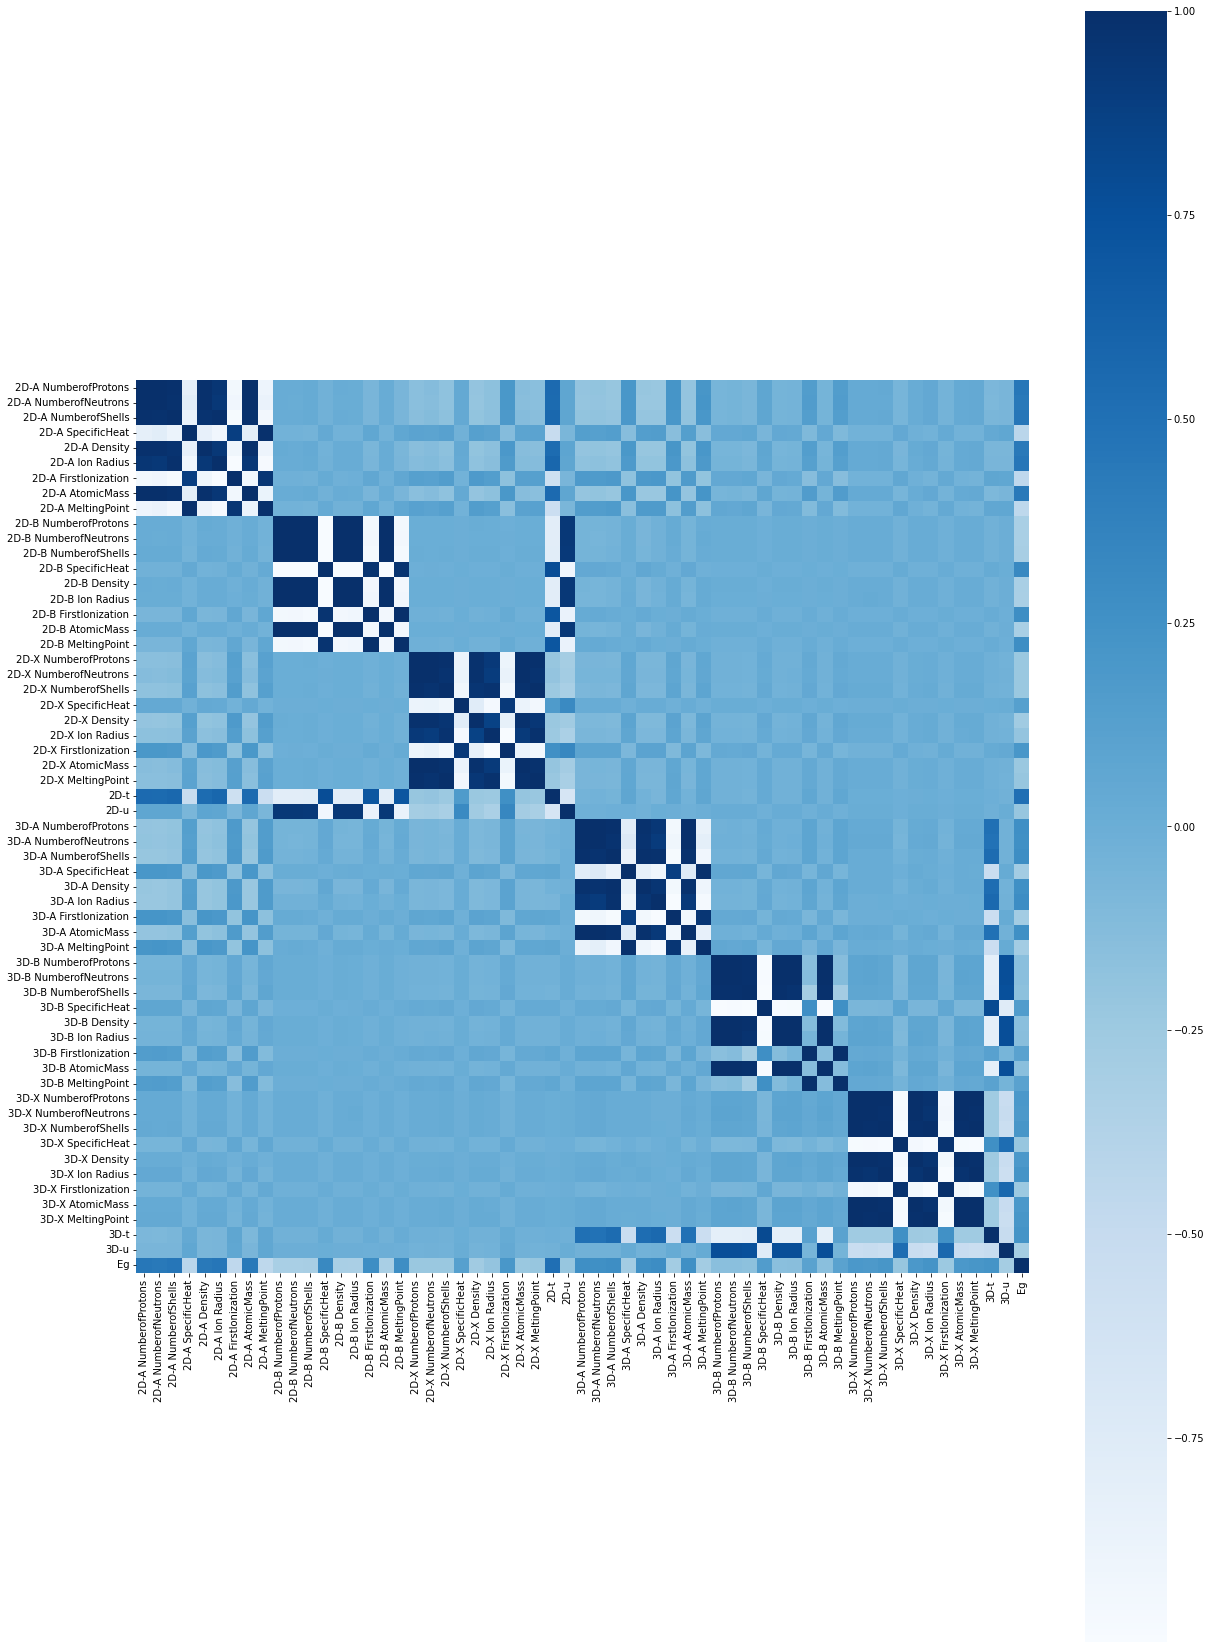

In [16]:
#将2d_pervsvskite.py输出文件加入容忍因子等，命名为Eg_final2.csv
dataset= r'ML/Eg_final2.csv'
data=pd.DataFrame(pd.read_csv(dataset))
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)
writer = pd.ExcelWriter('ML/output.xlsx')
corMat.to_excel(writer,'Sheet1')
writer.save()
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0)
plot.show()

In [19]:
#将output.xlsx复制成Eg_heatMap.xlsx  删减描述符，目标>0.2,之间<0.8
#根据Eg_heatMap.xlsx删减Eg_final2特征,生成新的Eg_After.csv
dataset= r'ML/Eg_After.csv'
data=pd.DataFrame(pd.read_csv(dataset))

                      2D-A NumberofProtons  2D-A SpecificHeat  \
2D-A NumberofProtons              1.000000          -0.813606   
2D-A SpecificHeat                -0.813606           1.000000   
2D-X NumberofProtons             -0.151115           0.099222   
2D-X FirstIonization              0.197110          -0.129423   
2D-t                              0.554317          -0.513921   
2D-u                              0.075813          -0.072939   
3D-A NumberofProtons             -0.202007           0.138420   
3D-A SpecificHeat                 0.203300          -0.134278   
3D-X NumberofShells               0.039362          -0.033379   
3D-t                             -0.084905           0.043973   
3D-u                             -0.069613           0.063806   
Eg                                0.448701          -0.426790   

                      2D-X NumberofProtons  2D-X FirstIonization      2D-t  \
2D-A NumberofProtons             -0.151115              0.197110  0.554317  

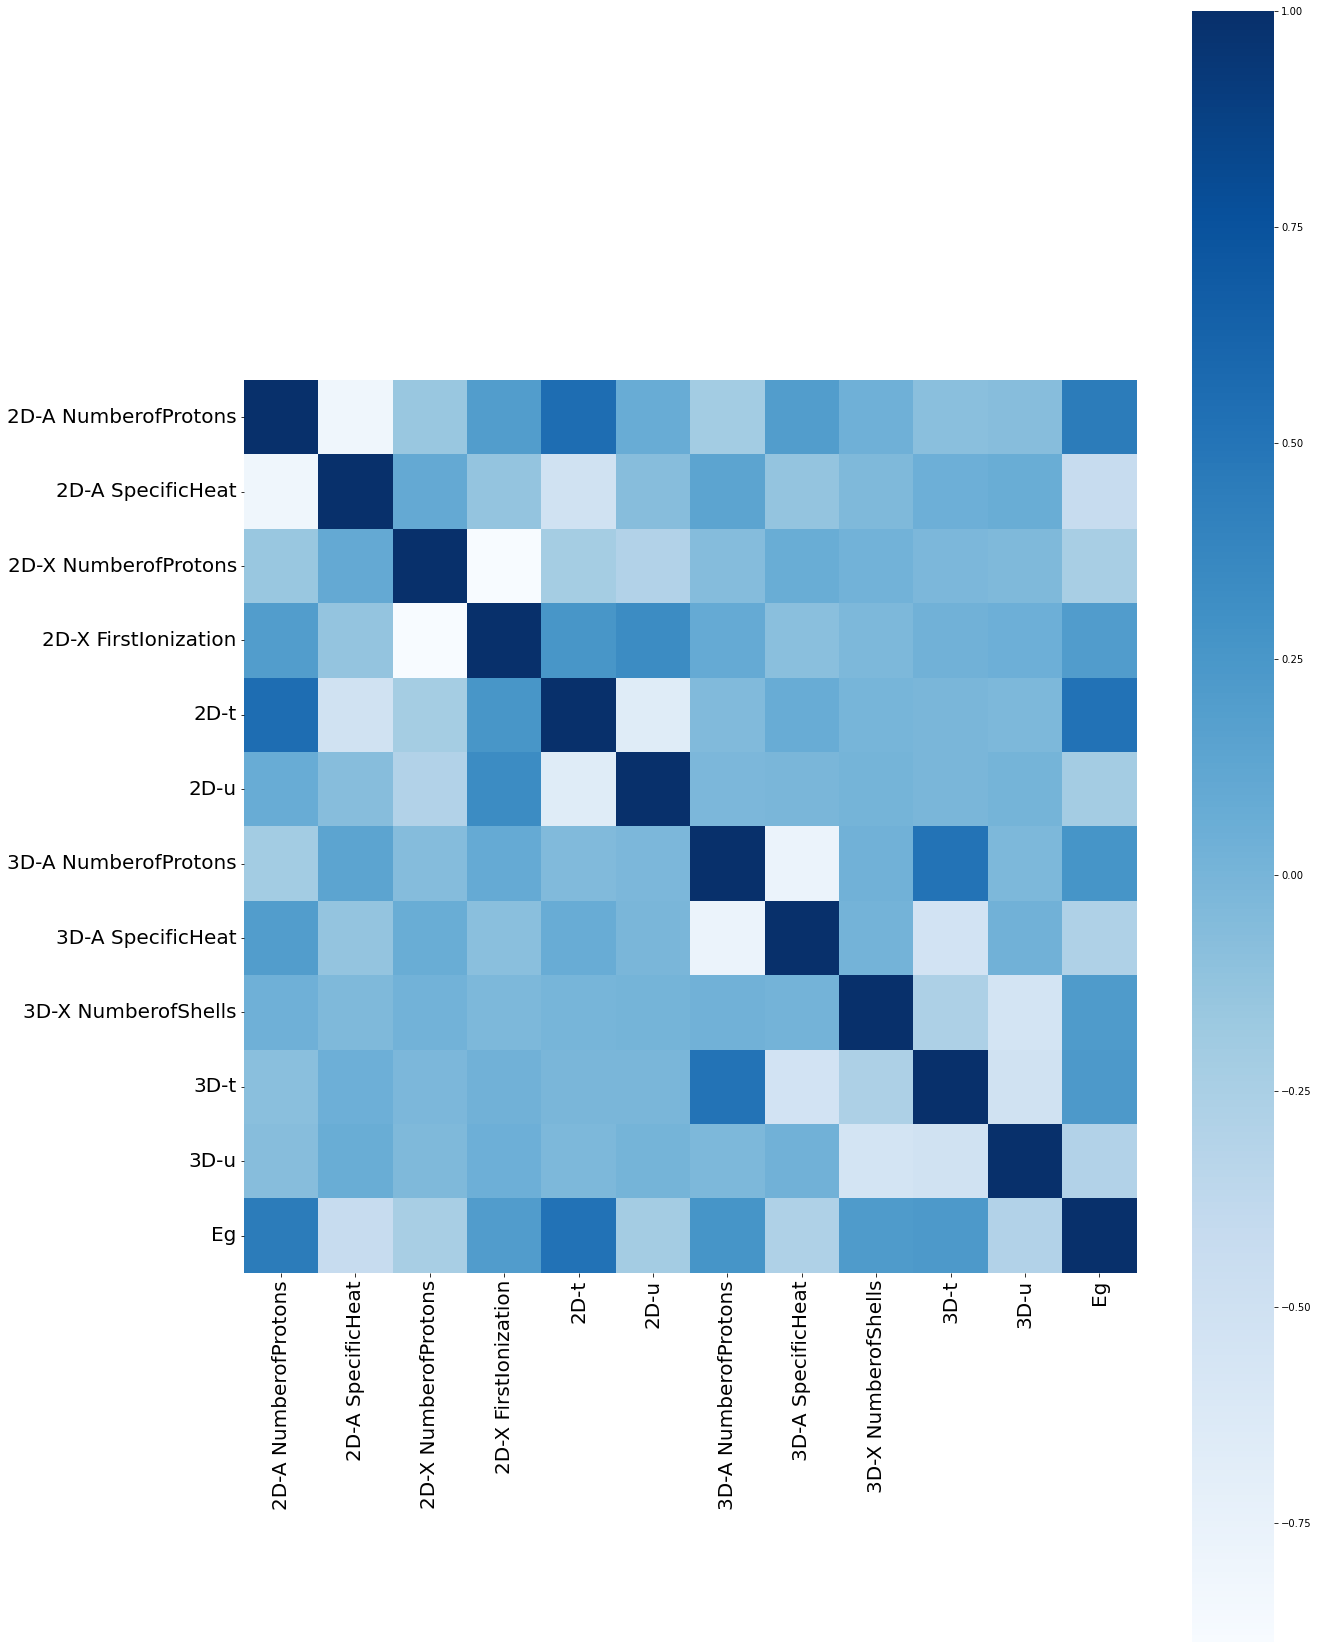

In [20]:
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)
writer = pd.ExcelWriter('output1.xlsx')
corMat.to_excel(writer,'Sheet1')
writer.save()
plt.figure(figsize=(20, 30))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Blues",linewidths=0) #annot_kws={"fontsize":20}
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plot.show()

In [21]:
#读取原数据集的特征和目标值
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)

for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])

for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [22]:
# 随机过采样
ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
X_ros, y_ros = ros.fit_resample(X_train, y_train.astype('int'))
print('随机过采样后标签数据统计：', Counter(y_ros))

param_grid = {
    'n_estimators':[10,11,13,15,17,19,],       # 决策树个数-随机森林特有参数
    'random_state':[0,10,42],
    'min_samples_split':[2,3],                     # 叶子的最小拆分样本
    'max_features':[0.1,0.2,0.3,0.4,0.5],  # 每棵决策树使用的变量占比-随机森林特有参数（结合原理）
    'max_depth':[5,6,7,8,9,10,20]                # 深度：这里是森林中每棵决策树的深度
}

rfr = ensemble.RandomForestRegressor()
rfr_cv = GridSearchCV(estimator=rfr, param_grid=param_grid,
                      scoring='neg_mean_squared_error', cv=10)
rfr_cv.fit(X_ros, y_ros)
print(rfr_cv.best_params_, rfr_cv.best_score_) # 输出最优参数及最优模型得分

随机过采样后标签数据统计： Counter({3: 119, 2: 119, 1: 119})
{'max_depth': 20, 'max_features': 0.1, 'min_samples_split': 2, 'n_estimators': 15, 'random_state': 0} -0.03957425044091711


In [23]:
#计算准确率
clf = RandomForestRegressor(max_depth=20,max_features=0.1, min_samples_split=2, n_estimators=15,random_state=0)
clf.fit(X_train, y_train)
y_prediction=clf.predict(X_test)
mse = mean_squared_error(y_test, y_prediction)
rmse = mse ** (1/2)
sse = np.sum((y_test - y_prediction) ** 2)
sst = np.sum((y_test - np.mean(X_test)) ** 2)
R2= 1 - sse / sst

from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_prediction)
print("R2:",R2)
print("RMSE:",rmse)
print("r:",pearsonr(y_test, y_prediction))
print("MAE:",MAE)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2b = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
print("R2b:",R2b)
print("MSE:",MSE)

R2: 0.9898744043940191
RMSE: 0.27987659030268663
r: (0.7129096842912943, 1.698410272068498e-07)
MAE: 0.20178536585365844
R2b: 0.5001848703999296
MSE: 0.07833090579945791


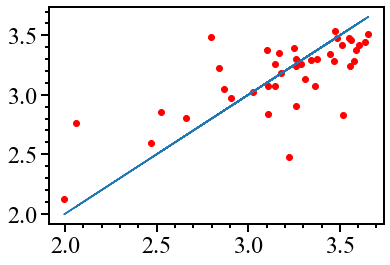

In [24]:
#plot图
plt.yticks(fontproperties = 'Times New Roman', size = 14)
plt.xticks(fontproperties = 'Times New Roman', size = 14)
plt.rcParams['font.sans-serif'] = 'Roman'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(y_test, y_test, label='Real Data')
plt.scatter(y_test, y_prediction, label='Predict', c='r')
ax=plt.gca()
ax.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(2)

plt.tick_params(width=2)
ax.xaxis.set_tick_params(labelsize=24)
plt.tick_params(which='major',length=8)
plt.tick_params(which='minor',length=4,width=2)
ax.yaxis.set_tick_params(labelsize=24)
xminorLocator   = MultipleLocator(1000)
yminorLocator   = MultipleLocator(1000)
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
plt.minorticks_on()
plt.show()

In [27]:
#使用KFold交叉验证

for nk in range(2,10):
 kfolder = KFold(n_splits=nk)
 score=0
 for train, test in kfolder.split(X_train, y_train):
   train_data = np.array(data)[train]
   test_data = np.array(data)[test]
   trany=train_data[:,11]
   tranx=train_data[:,:11]
   testx=test_data[:,:11]
   testy=test_data[:,11]
   clf.fit(tranx,trany)
   pu=pearsonr(testy,clf.predict(testx))
   score=score+pu[0]
 print(score/nk)

0.3418413464143186
0.4348856364943847
0.6684895956938683
0.5980232162165675
0.5579560057400175
0.5775403429019255
0.6618773296812359
0.6457581372635534
